In [15]:
## Pandas dan Numpy
import pandas as pd
import numpy as np

# Visualization Library
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as st
from scipy.stats import chi2_contingency

# Problem Statement
Your client is a Portuguese consumer bank which recently ran a direct marketing campaign by direct phone calls. Bank customers were offered a term deposit. The result-- whether customer opened a term deposit or not -- were recorded. Data was gathered from May 2008 to November 2010. The bank wants to build an automated system to predict whether a new customer would open a term deposit or not, so it can perform better targeted marketing. 

Data source: https://archive.ics.uci.edu/ml/datasets/bank+marketing

Citation Request:

This dataset is public available for research. The details are described in S. Moro, P. Cortez and P. Rita. "A Data-Driven Approach to Predict the Success of Bank Telemarketing." Decision Support Systems, Elsevier, 62:22-31, June 2014

# Goal and Objectives

Goal:
Predict if the client will subscribe a term deposit.

Objectives:
- Perform Exploratory Data Analysis
- Prepare the data which include Feature engineering
- Modelling
- Evaluation
- Give recommendation

# Exploratory Data Analysis

In [16]:
bank = pd.read_csv('bank-full.csv', engine='python', sep=None)
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [17]:
info = bank.info()
describe = bank.describe()
null = bank.isnull().sum()

print(info)
print("\n\033[1mDescriptive Statistics:\033[0m")
print(describe)
print("\n\033[1mNull Values:\033[0m")
print(null)
print("\n\033[1mUnique Values:\033[0m")
for col in bank.columns:
  print(f"Unique values of '{col}': {bank[col].unique()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
None

Descriptive Statistics:
                age        balance           day      duration      c

In [18]:
# divide numerical & categorical data
numerical = bank.select_dtypes(exclude='object')
categorical = bank.select_dtypes(include='object')
num = numerical.columns
cat = categorical.columns

In [19]:
print("Mode:")
print(numerical.mode(axis=0))

Mode:
   age  balance  day  duration  campaign  pdays  previous
0   32        0   20       124         1     -1         0


Attributes:

age : customer age (numeric)

job : type of job (Categorical)

marital : marital status (Categorical)

education : level of education (Categorical)

default: has unpaid credit (Categorical)

balance: average yearly balance, in euros (numeric)

housing: has housing loan (Categorical)

loan: has personal loan (Categorical)

contact: how the bank contact the customer (Categorical)

day: last contact day (categorical)

month: last contact month (Categorical)

duration: last contact duration, in seconds (numeric)

campaign: number of contacts performed during this campaign and for this client (numeric)

pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric); -1 means client was not previously contacted

previous: number of contacts performed before this campaign and for this client (numeric)

poutcome: outcome of the previous marketing campaign (categorical)

y: has the client subscribed a term deposit? (binary: 'yes','no')

## Univariate Analysis

### Distribution of numerical features

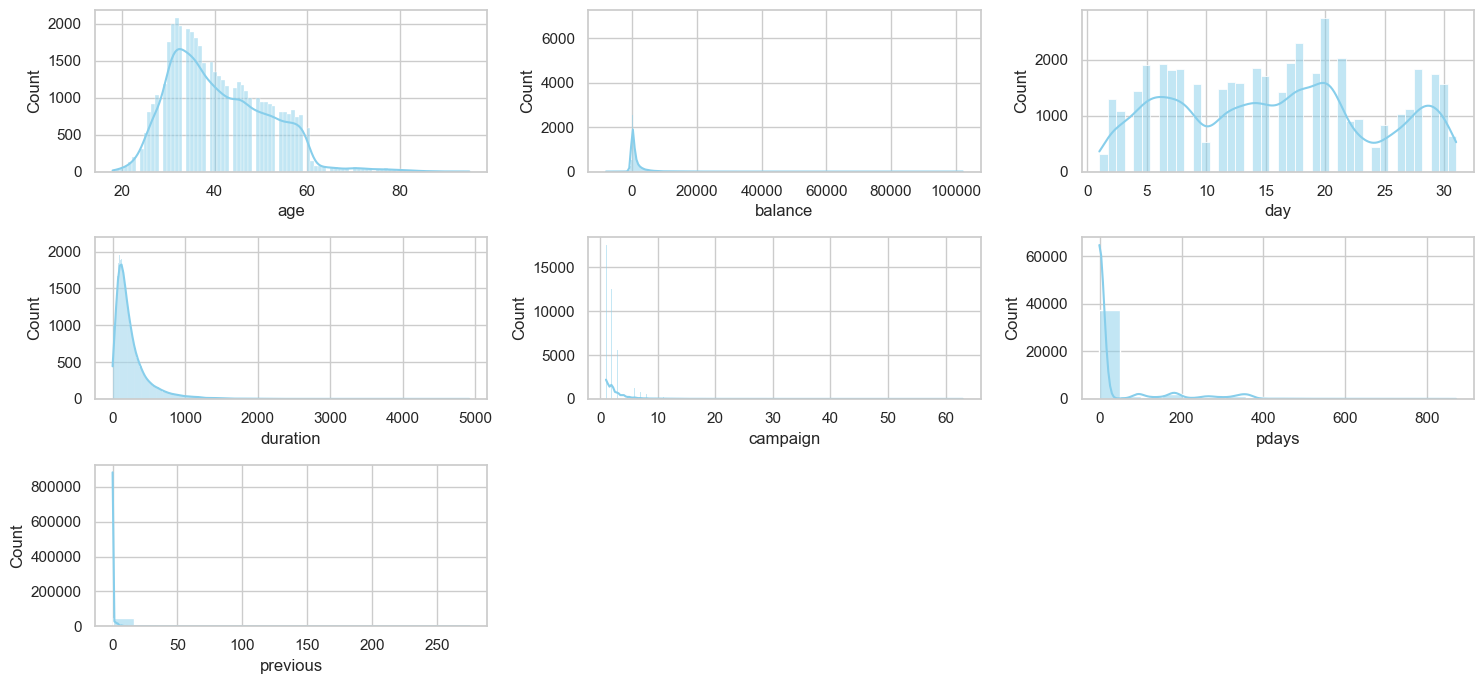

In [20]:
plt.figure(figsize=(15,7))
sns.set(style="whitegrid")
for i in range(0, len(num)):
    plt.subplot(3, 3, i+1)
    sns.histplot(bank[num[i]], kde=True, color = "skyblue")
plt.tight_layout()

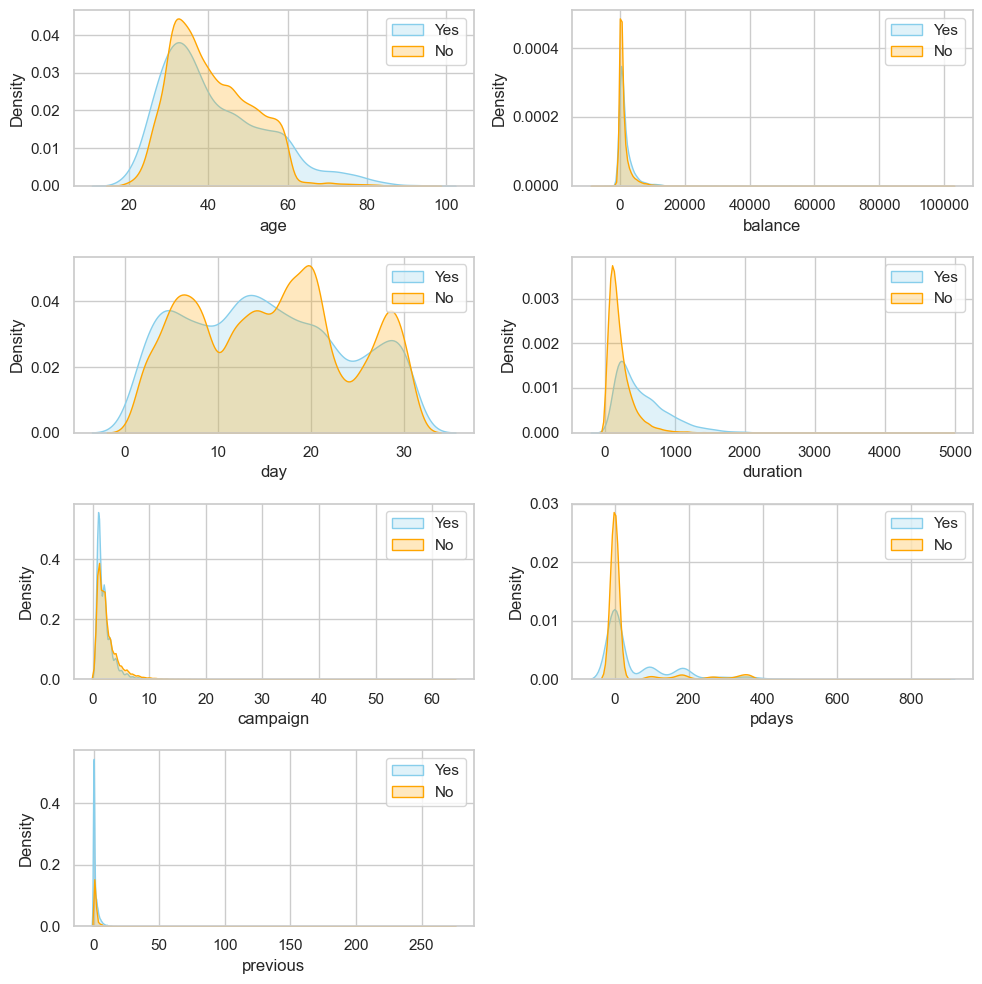

In [21]:
yes = bank[bank['y']=='yes']
no = bank[bank['y']=='no']

plt.figure(figsize=(10,10))
sns.set(style="whitegrid")
for i in range(0, len(num)):
    plt.subplot(4, 2, i+1)
    sns.kdeplot(yes[num[i]], color = "skyblue", label= 'Yes', fill=True, warn_singular=False)
    sns.kdeplot(no[num[i]], color = "orange", label= 'No', fill=True, warn_singular=False)
    plt.legend()
plt.tight_layout()

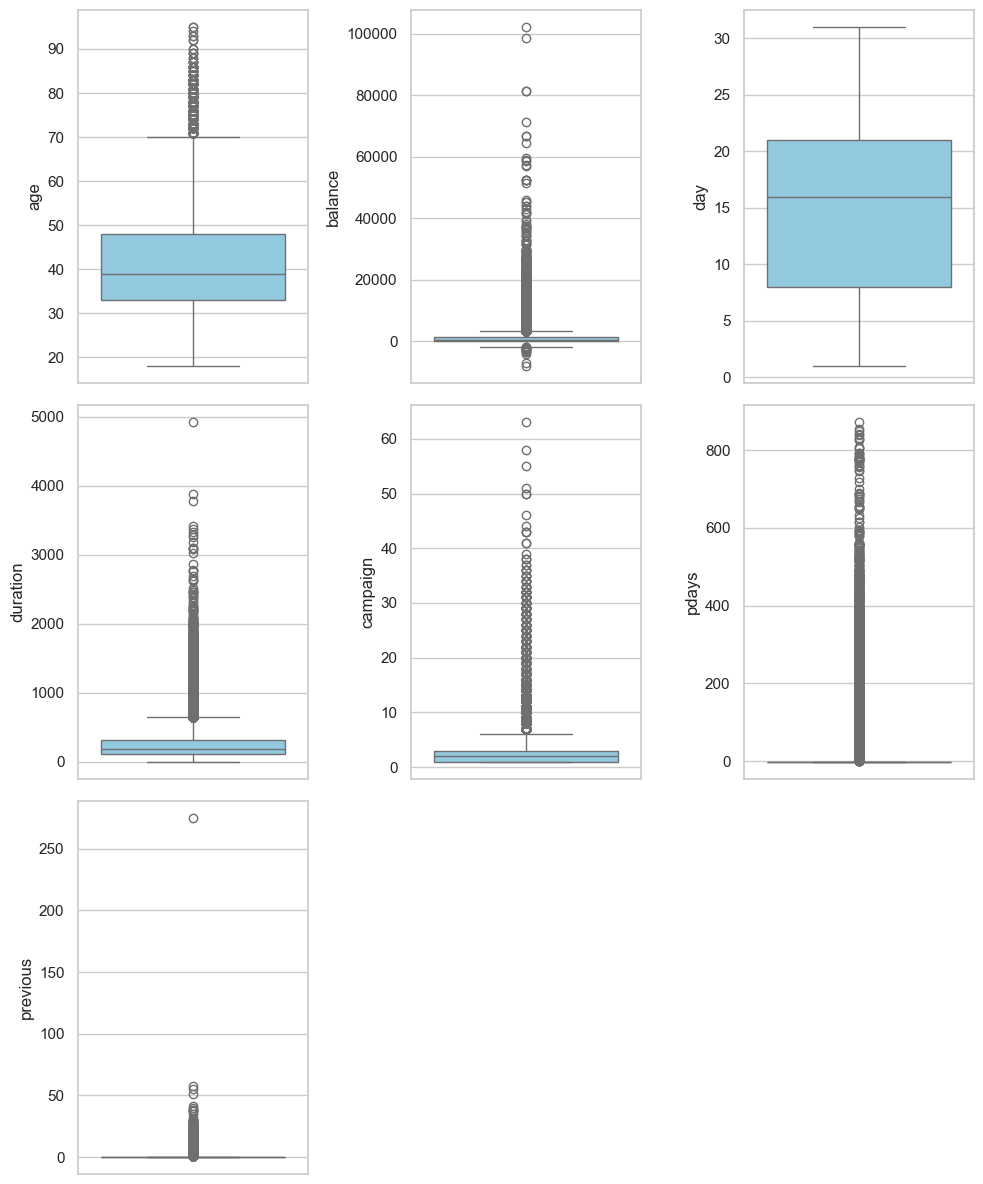

In [22]:
plt.figure(figsize=(10,12))
sns.set(style="whitegrid")
for i in range(0, len(num)):
    plt.subplot(3, 3, i+1)
    sns.boxplot(bank[num[i]], color = "skyblue")
plt.tight_layout()

- The average age of customer is 39. Customers are mostly in the 18-70 age bracket. People over 60 years old largely chose to open a deposit account.
- The average balance is 448 euros (I use median because the distribution is positively skewed). There are many outliers.
- Bank made calls evenly throughout the month, with most call at day 20. Customers likely decide to open a deposit account after this particular call, so it could be considered a critical event.
- The average duration of call is 180 s or 3 minutes, and it seems that calls longer than 250 s (4 minutes) resulted in more customer opening a deposit account. There are many outliers.
- Bank typically made 2 calls.
- Most customer hasn't been contacted previously.

### Categorical features

In [23]:
# see the frequency of top value in categorical columns
freq_cat = bank[cat].describe()
print(freq_cat)

                job  marital  education default housing   loan   contact  \
count         45211    45211      45211   45211   45211  45211     45211   
unique           12        3          4       2       2      2         3   
top     blue-collar  married  secondary      no     yes     no  cellular   
freq           9732    27214      23202   44396   25130  37967     29285   

        month poutcome      y  
count   45211    45211  45211  
unique     12        4      2  
top       may  unknown     no  
freq    13766    36959  39922  


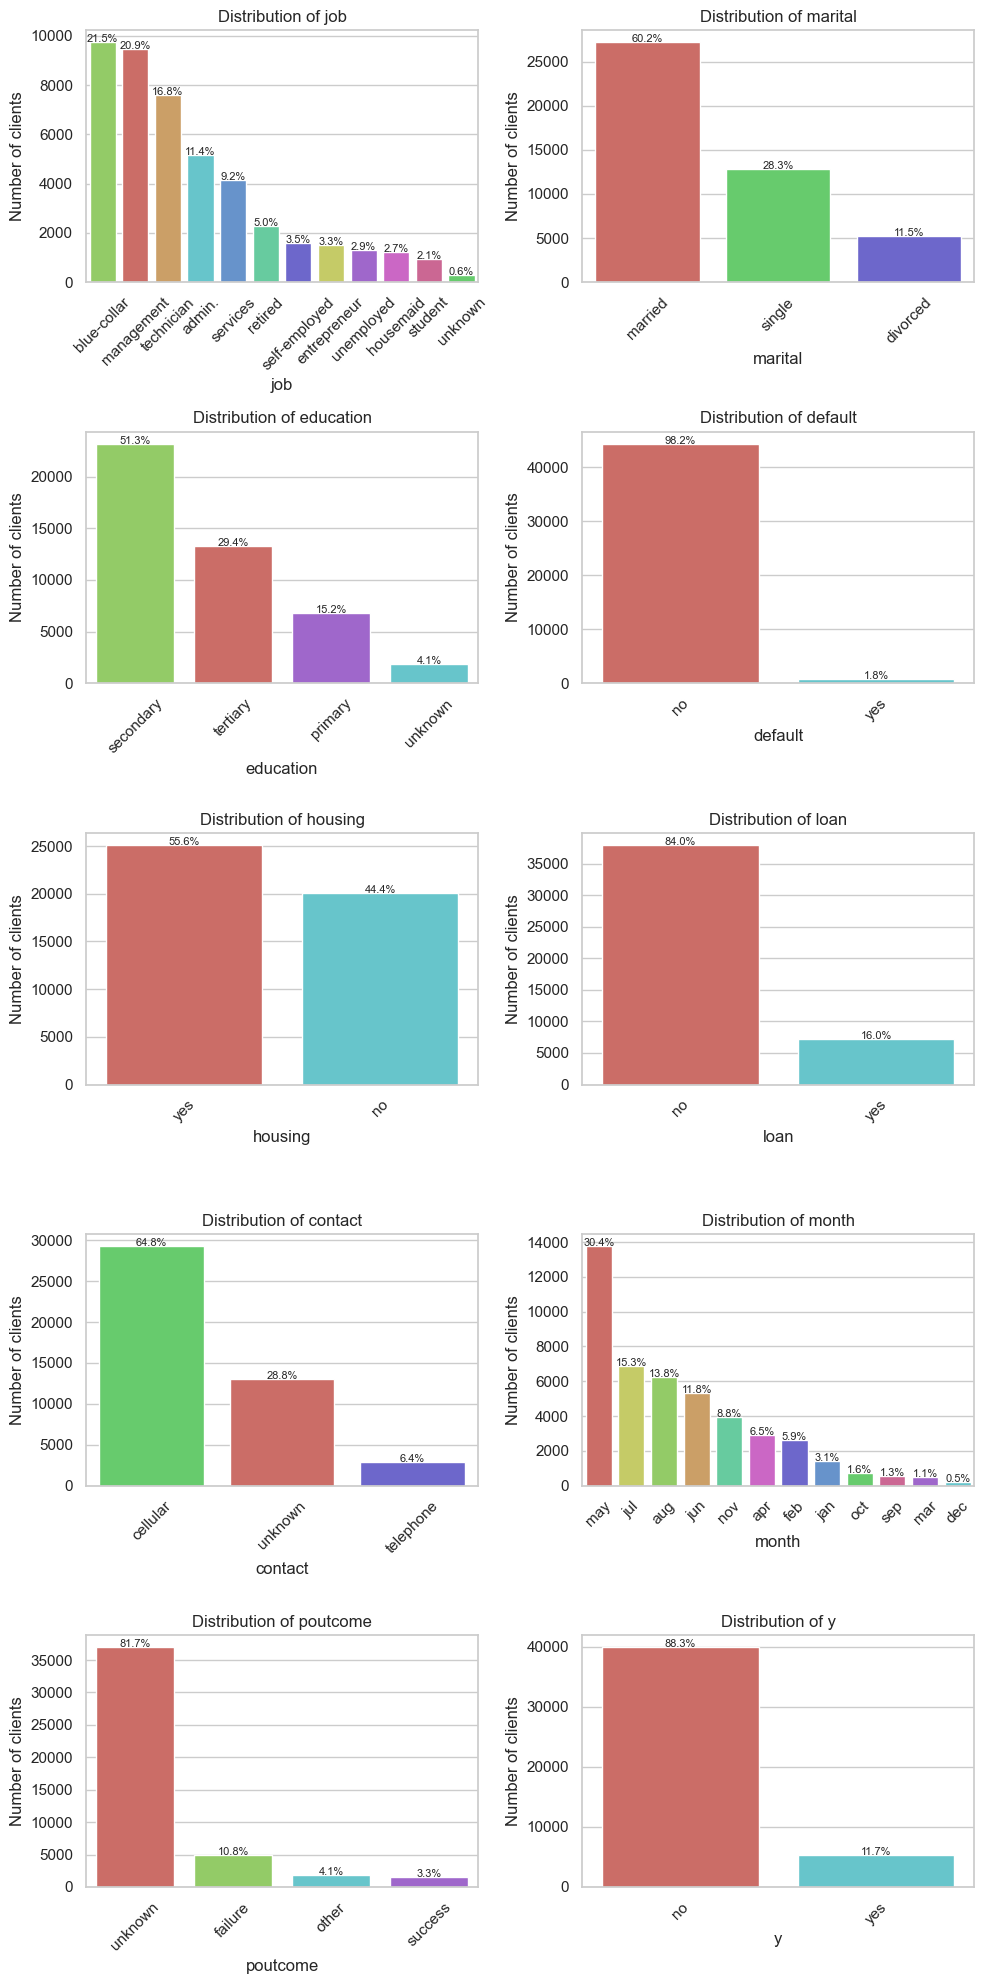

In [24]:
ax = plt.figure(figsize=(10,20))
for i, column in enumerate(cat, 1):
    plt.subplot(5, 2, i)
    sns.countplot(data=bank, x=column, order=bank[column].value_counts().index, palette='hls', hue=column)
    plt.title(f'Distribution of {column}')
    plt.ylabel('Number of clients')

    # Calculate and display percentages on top of each bar
    total = len(bank[column])
    for p in plt.gca().patches:
        height = p.get_height()
        plt.gca().text(p.get_x() + p.get_width() / 2, height + 0.1, f'{height/total:.1%}', ha='center', fontsize=8)
    
    # Rotate x-axis tick labels
    plt.xticks(rotation=45)
    
    plt.tight_layout()

- Most customers are blue-collar workers, followed by management, technician, admin, and services in order.
- 88.5% of customers are married and single.
- More than a half customer completed secondary education, with 30% in tertiary level.
- Around 98% of customers do not have default credit account.
- There is not much difference between the number of customer who has housing loan and without housing loan.
- 84% of customers do not have personal loan.
- Almost 65% of calls were made through cellular.
- May recorded the highest count of calls.
- It seems that the bank didn't properly follow up its previous campaign and record the result, because almost 82% records are identified as 'unknown'.
- There are approximately 88% of customers who don't open a term deposit.

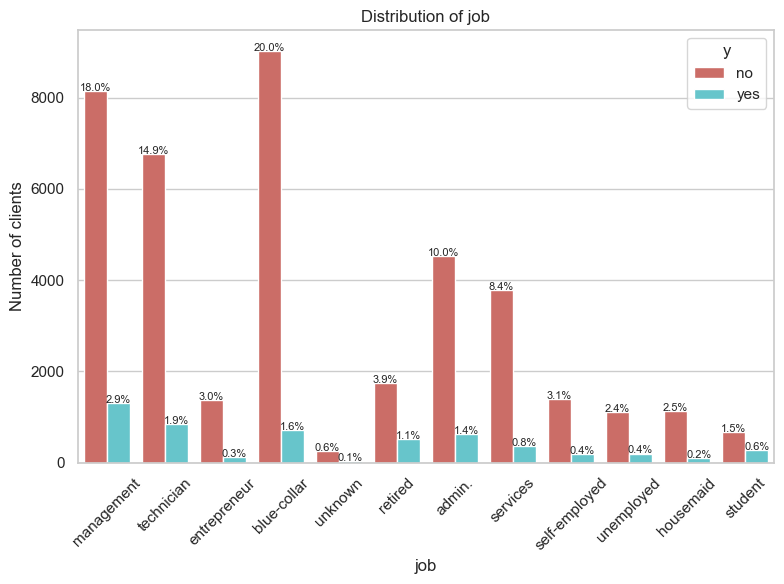

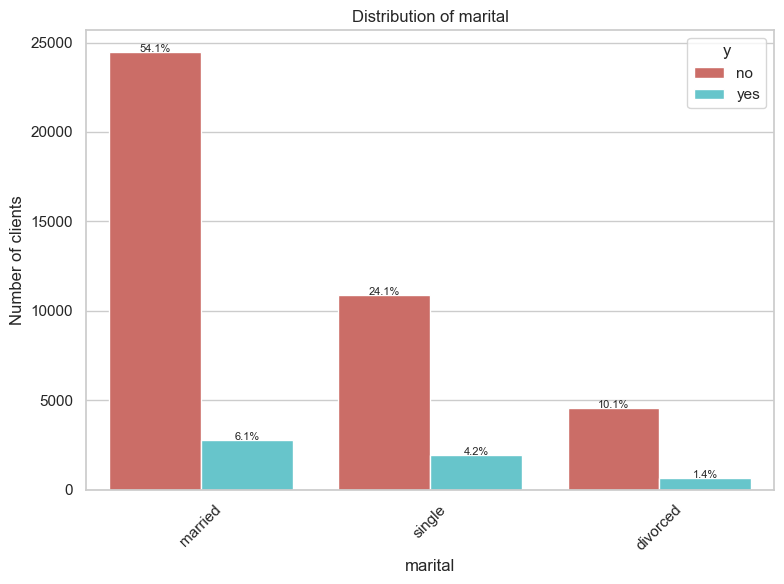

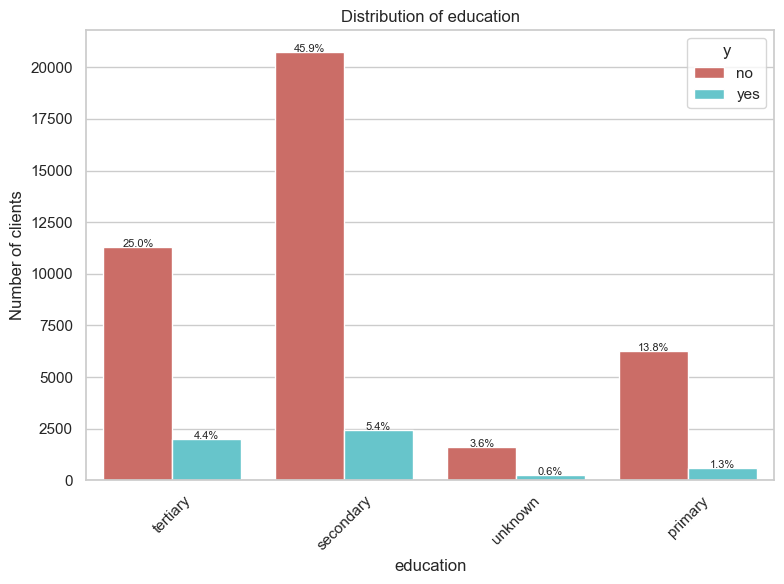

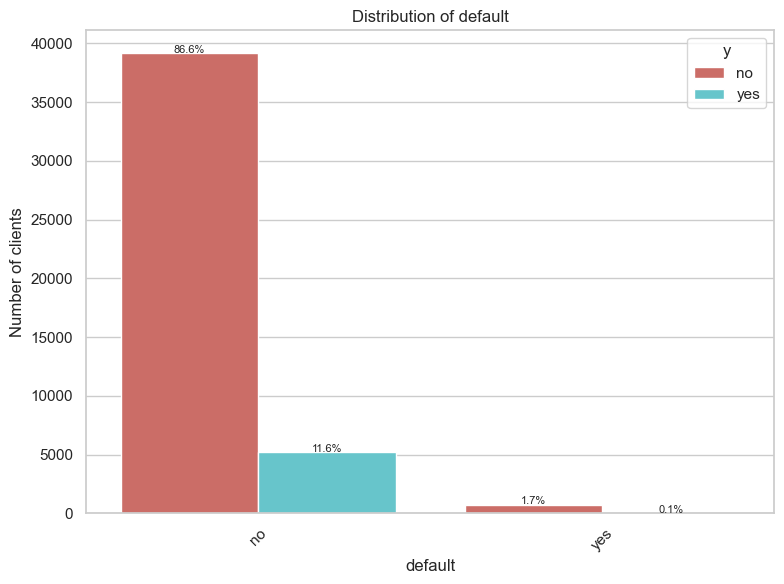

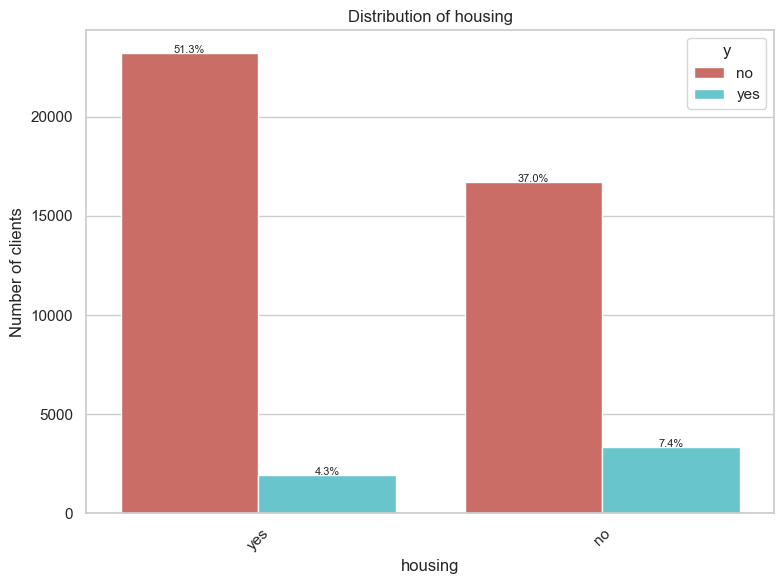

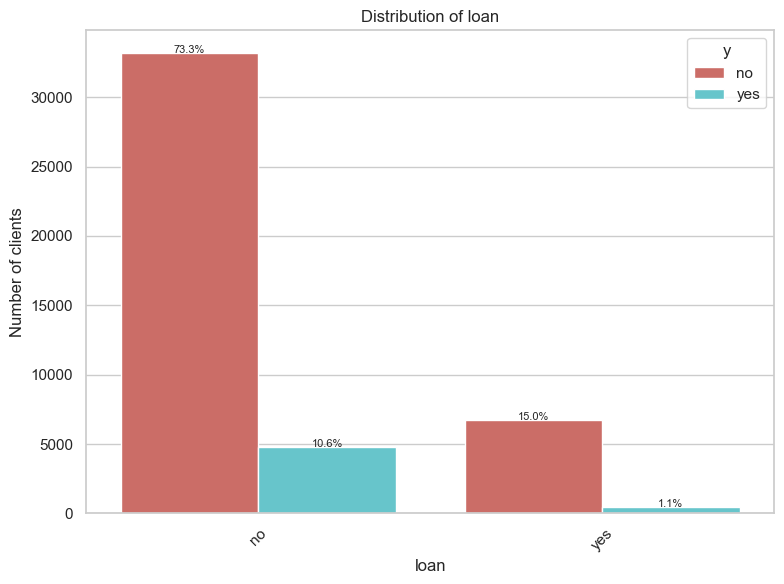

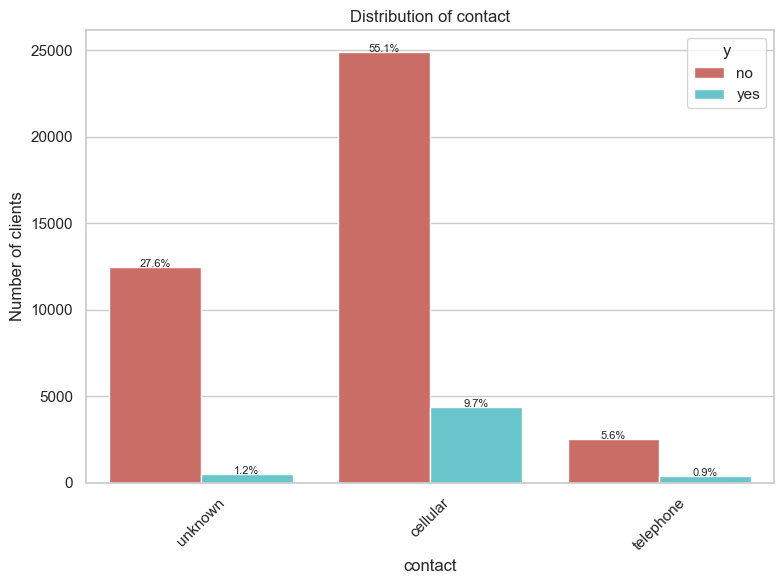

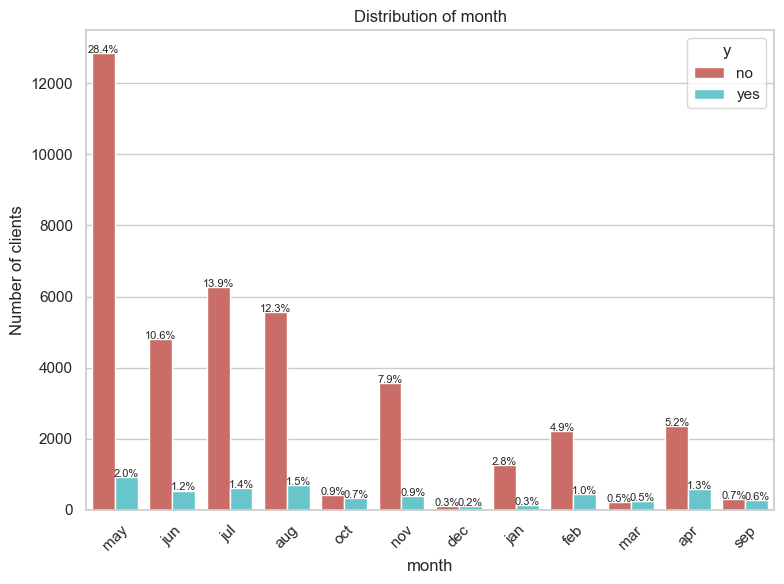

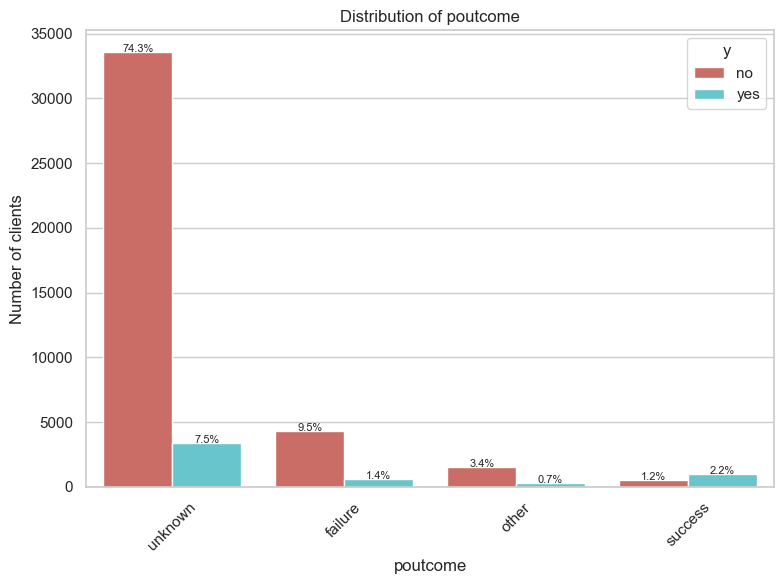

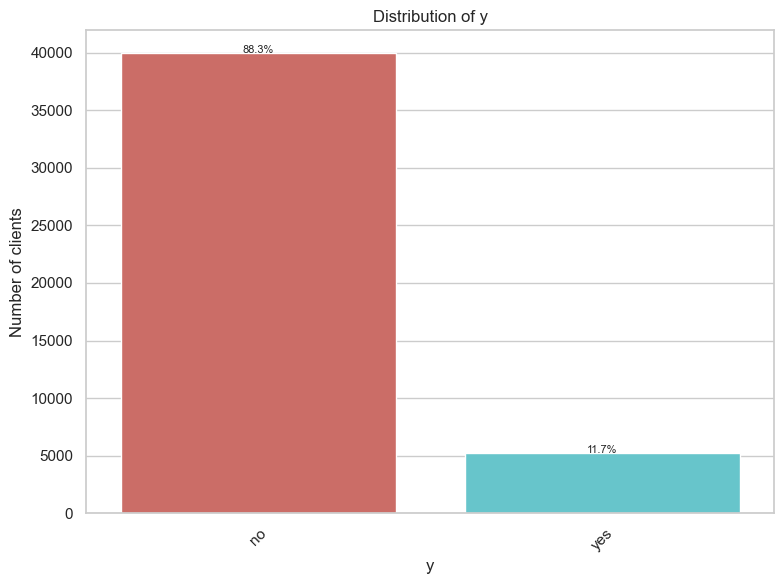

In [25]:
for column in cat:
    plt.figure(figsize=(8, 6))

    sns.countplot(data=bank, x=column, hue='y', palette='hls')
    plt.title(f'Distribution of {column}')
    plt.ylabel('Number of clients')

    # Calculate and display percentages on top of each bar
    total = len(bank[column])
    for p in plt.gca().patches:
        height = p.get_height()
        if height > 0:
            plt.gca().text(p.get_x() + p.get_width() / 2, height + 1, f'{height/total:.1%}', ha='center', fontsize=8)

    plt.xticks(rotation=45)
    plt.tight_layout()

- Customers who opened deposit account mostly work in management, married, finished secondary education, do not have any loan and unpaid credit.
- Relatively, single customers responded better than married customers.
- Most succesful conversion were contacted by cellular.
- Month do not seem to have any significance to customer decision because the distribution of people opening account is quite uniform in all months.
- Most do not have a history of previous campaign.

In [ ]:
for i in range(0, len(cat)):
    plt.figure(figsize=(6, 45))
    plt.subplot(10, 1, i+1)
    
    ax = sns.countplot(data=bank, x=cat[i], hue="y", dodge=False, palette="PuOr")

    plt.yscale('log')

    # Calculate and display percentages on top of each bar
    for p in ax.patches:
        height = p.get_height()
        width = p.get_width()
        x = p.get_x()
        y = p.get_y()
        percentage = f'{height / total :.1%}'
        ax.annotate(percentage, (x + width / 2, y + height * 1.02),ha='center', fontsize=8)

    plt.title(f'Distribution of {cat[i]}')
    plt.xticks(rotation=45)
    plt.tight_layout()

## Multivariate Analysis

In [26]:
# change all boolean columns to numerical columns to determine correlation

bank2 = bank.copy()

# Mapping 'yes' to 1 and 'no' to 0
bank2['default'] = bank2['default'].map({'yes': 1, 'no': 0})
bank2['housing'] = bank2['housing'].map({'yes': 1, 'no': 0})
bank2['loan'] = bank2['loan'].map({'yes': 1, 'no': 0})
bank2['y'] = bank2['y'].map({'yes': 1, 'no': 0})

# Changing pdays=-1 to pdays=0
bank2.loc[bank2['pdays'] == -1, 'pdays'] = 0

bank2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,0,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,0,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,0,0,unknown,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,0,0,unknown,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,0,0,unknown,0


<Axes: >

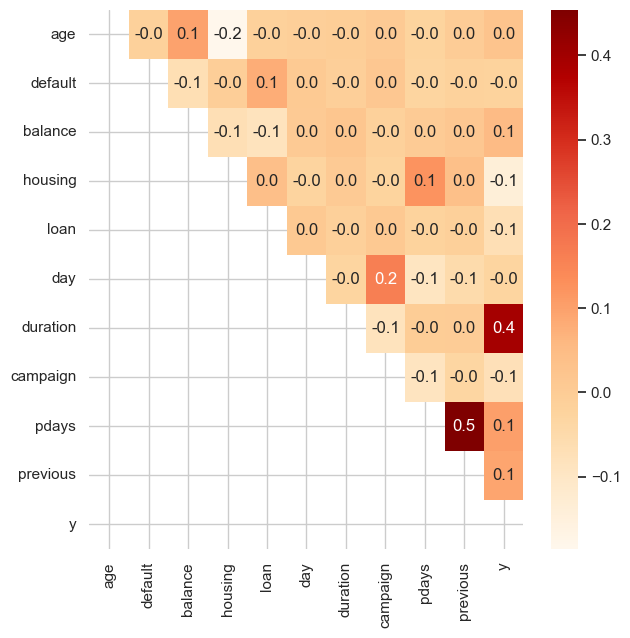

In [27]:
# correlation between numerical features
numericals2 = bank2.select_dtypes(exclude='object')
num2 = numericals2.columns
corr = numericals2.corr()

#create and apply mask
mask = corr.where(np.triu(np.ones(corr.shape, dtype=bool), k=1))

#create heatmap
plt.figure(figsize=(7,7))
sns.heatmap(mask, cmap='OrRd', annot=True, fmt='.1f')

- The target variable (y) has the highest correlation with duration of call.
- There is a slight positive correlation between target and balance, the number of days since last contact, and the number of contacts performed before.
- There is a slight negative correlation between target and personal loan, housing loan, and number of campaign.
- There is a high correlation between the number of days since last contact and the number of contacts performed before this campaign. This is expected because most customers hasn't been contacted previously.
- There is a slight positive correlation between last contact day and number of campaign. 
- There is a slight positive correlation between the number of days since last contact and housing loan. Customers who have housing loan must have been in contact with the bank before.
- There is a slight positive correlation between age and balance. This makes sense because usually people would have higher savings over time.
- There is a slight negative correlation between age and loan. This makes sense because older people tend to have less personal loan because they already paid it and have less needs.

In [28]:
# Pairplot

#plt.figure(figsize = (15,15))
#sns.pairplot(bank2[num2], diag_kind='kde', kind='reg', hue='y', palette='Set2')

# Data Pre-processing

In [29]:
# Drop duplicates

bank2.duplicated().sum()

0

In [30]:
from scipy import stats

In [31]:
## Handle outliers

print(f'Number of rows before dropping outliers: {len(bank2)}')

# Calculate z-scores for all columns
z_scores = bank2[num2].apply(lambda x: np.abs(stats.zscore(x)))

# Create a boolean mask for entries below the threshold
z_filter = (z_scores < 3)

# Apply the mask to filter the DataFrame
bank3 = bank2[z_filter.all(axis=1)]

print(f'Number of rows before dropping outliers: {len(bank3)}')

Number of rows before dropping outliers: 45211
Number of rows before dropping outliers: 39456


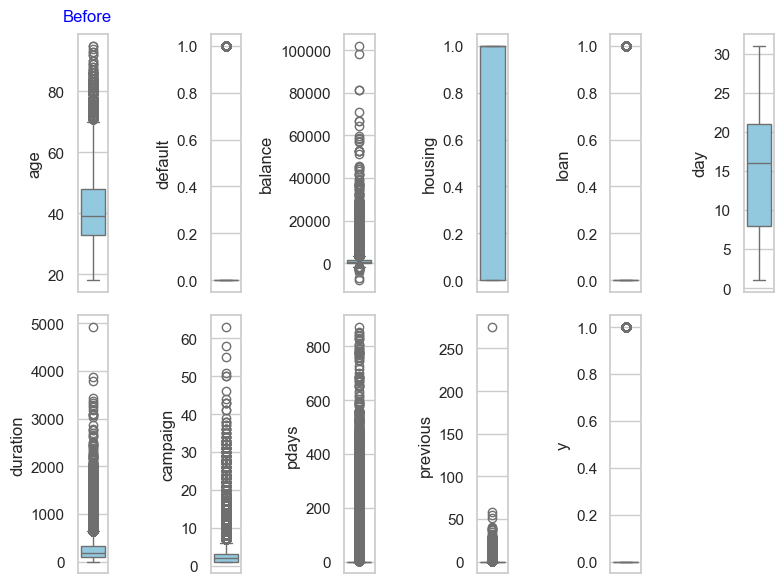

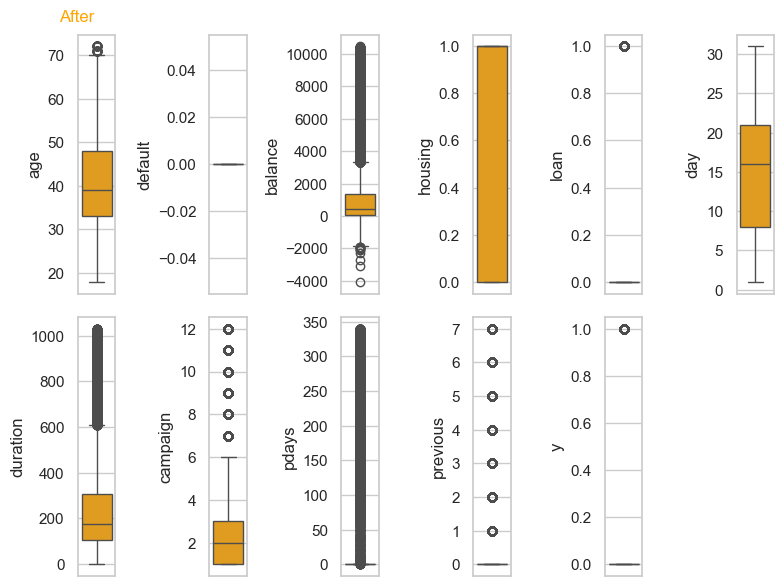

In [32]:
num3 = bank3.select_dtypes(exclude='object').columns

# Graphical representation of outlier handling
plt.figure(figsize=(8,6))
sns.set(style="whitegrid")
for i in range(0, len(num2)):
    plt.subplot(2, 6, i+1)
    sns.boxplot(bank2[num2[i]], color = "skyblue")
    if i == 0:  # Add 'Before' annotation only for the first plot
        plt.text(-0.5, 1.05, 'Before', transform=plt.gca().transAxes, fontsize=12, color='blue')
plt.tight_layout()

plt.figure(figsize=(8,6))
sns.set(style="whitegrid")
for i in range(0, len(num3)):
    plt.subplot(2, 6, i+1)
    sns.boxplot(bank3[num3[i]], color = "orange")
    if i == 0:  # Add 'Before' annotation only for the first plot
        plt.text(-0.5, 1.05, 'After', transform=plt.gca().transAxes, fontsize=12, color='orange')
plt.tight_layout()

In [33]:
## Normalization
bank_norm = bank3.copy()

# Import library
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Select the columns you want to normalize
norm_data = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

# Normalize the specified columns
bank_norm[norm_data] = StandardScaler().fit_transform(bank_norm[norm_data])

bank_norm.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1.715242,management,married,tertiary,0,0.599361,1,0,unknown,-1.293254,may,0.132177,-0.749493,-0.367211,-0.336171,unknown,0
1,0.328920,technician,single,secondary,0,-0.623825,1,0,unknown,-1.293254,may,-0.445454,-0.749493,-0.367211,-0.336171,unknown,0
2,-0.760333,entrepreneur,married,secondary,0,-0.639448,1,1,unknown,-1.293254,may,-0.839293,-0.749493,-0.367211,-0.336171,unknown,0
3,0.625989,blue-collar,married,unknown,0,0.230785,1,0,unknown,-1.293254,may,-0.755274,-0.749493,-0.367211,-0.336171,unknown,0
4,-0.760333,unknown,single,unknown,0,-0.640026,0,0,unknown,-1.293254,may,-0.198648,-0.749493,-0.367211,-0.336171,unknown,0


In [34]:
## Feature Encoding

# education, month -> label encoding
map_education = {'tertiary':3, 'secondary':2, 'unknown':0, 'primary':1}
map_month = {'jan':1, 'feb':2, 'mar':3, 'apr':4, 'may':5, 'jun':6, 'jul':7, 'aug':8, 'sep':9, 'oct':10, 'nov':11, 'dec':12}

bank_norm['education'] = bank_norm['education'].map(map_education)
bank_norm['month'] = bank_norm['month'].map(map_month)

bank_norm.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1.715242,management,married,3,0,0.599361,1,0,unknown,-1.293254,5,0.132177,-0.749493,-0.367211,-0.336171,unknown,0
1,0.328920,technician,single,2,0,-0.623825,1,0,unknown,-1.293254,5,-0.445454,-0.749493,-0.367211,-0.336171,unknown,0
2,-0.760333,entrepreneur,married,2,0,-0.639448,1,1,unknown,-1.293254,5,-0.839293,-0.749493,-0.367211,-0.336171,unknown,0
3,0.625989,blue-collar,married,0,0,0.230785,1,0,unknown,-1.293254,5,-0.755274,-0.749493,-0.367211,-0.336171,unknown,0
4,-0.760333,unknown,single,0,0,-0.640026,0,0,unknown,-1.293254,5,-0.198648,-0.749493,-0.367211,-0.336171,unknown,0


In [36]:
# marital, job, contact, poutcome -> one-hot encoding

dummy_marital = pd.get_dummies(bank_norm['marital'], prefix='status', dtype=int)
dummy_job = pd.get_dummies(bank_norm['job'], prefix='job', dtype=int)
dummy_contact = pd.get_dummies(bank_norm['contact'], prefix='contact', dtype=int)
dummy_poutcome = pd.get_dummies(bank_norm['poutcome'], prefix='outcome', dtype=int)
bank_encode = pd.concat([bank_norm, dummy_marital, dummy_job, dummy_contact, dummy_poutcome],axis=1)

bank_encode.drop(['marital', 'job', 'contact', 'poutcome'], axis=1, inplace=True)

bank_encode.head()

,age,education,default,balance,housing,loan,day,month,duration,campaign,...,job_technician,job_unemployed,job_unknown,contact_cellular,contact_telephone,contact_unknown,outcome_failure,outcome_other,outcome_success,outcome_unknown
0,1.715242,3,0,0.599361,1,0,-1.293254,5,0.132177,-0.749493,...,0,0,0,0,0,1,0,0,0,1
1,0.328920,2,0,-0.623825,1,0,-1.293254,5,-0.445454,-0.749493,...,1,0,0,0,0,1,0,0,0,1
2,-0.760333,2,0,-0.639448,1,1,-1.293254,5,-0.839293,-0.749493,...,0,0,0,0,0,1,0,0,0,1
3,0.625989,0,0,0.230785,1,0,-1.293254,5,-0.755274,-0.749493,...,0,0,0,0,0,1,0,0,0,1
4,-0.760333,0,0,-0.640026,0,0,-1.293254,5,-0.198648,-0.749493,...,0,0,1,0,0,1,0,0,0,1


In [ ]:
## Class Imbalance

# Karena kelas minoritas ('yes') dari target = 11.7% > 10%, jadi kita tidak perlu handling imbalance

In [38]:
bank_sample=bank_encode[['age', 'education', 'default', 'balance', 'duration']].copy()
bank_sample.head()

,age,education,default,balance,duration
0,1.715242,3,0,0.599361,0.132177
1,0.328920,2,0,-0.623825,-0.445454
2,-0.760333,2,0,-0.639448,-0.839293
3,0.625989,0,0,0.230785,-0.755274
4,-0.760333,0,0,-0.640026,-0.198648


# Modelling

## ML Metrics

- Accuracy
- AUC (because the target class is almost imbalance)

1. Decision Trees
2. Random Forest
3. Gradient Boosting (e.g., XGBoost, LightGBM, CatBoost)
4. Support Vector Machines (SVM)

In [40]:
features=[bank_sample]
features

[            age  education  default   balance  duration
 0      1.715242          3        0  0.599361  0.132177
 1      0.328920          2        0 -0.623825 -0.445454
 2     -0.760333          2        0 -0.639448 -0.839293
 3      0.625989          0        0  0.230785 -0.755274
 4     -0.760333          0        0 -0.640026 -0.198648
 ...         ...        ...      ...       ...       ...
 45203 -1.750563          3        0 -0.575222  0.158433
 45205 -1.552517          2        0 -0.348406  0.788576
 45206  1.022081          3        0 -0.163250  3.892030
 45207  3.002541          1        0  0.359815  1.156160
 45209  1.616219          2        0 -0.254092  1.429222
 
 [39456 rows x 5 columns]]

In [42]:
featx=np.reshape(features, (39456, 5), order='A')
featx

array([[ 1.71524187,  3.        ,  0.        ,  0.59936081,  0.13217746],
       [ 0.32891973,  2.        ,  0.        , -0.62382515, -0.44545354],
       [-0.76033339,  2.        ,  0.        , -0.63944768, -0.83929286],
       ...,
       [ 1.0220808 ,  3.        ,  0.        , -0.16324993,  3.89203017],
       [ 3.002541  ,  1.        ,  0.        ,  0.3598154 ,  1.15615969],
       [ 1.61621886,  2.        ,  0.        , -0.25409202,  1.42922162]])

In [43]:
from sklearn.neural_network import MLPClassifier

In [60]:
clf = MLPClassifier(solver='sgd',random_state=1, max_iter=200, hidden_layer_sizes=(5,2))

In [61]:
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    featx, np.array(bank_encode['y']), test_size=0.2, shuffle=True)

In [62]:
clf.fit(X_train, y_train)
predicted=clf.predict(X_test)
predicted

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [63]:
from sklearn.metrics import ConfusionMatrixDisplay

Confusion matrix:
[[7096   15]
 [ 759   22]]


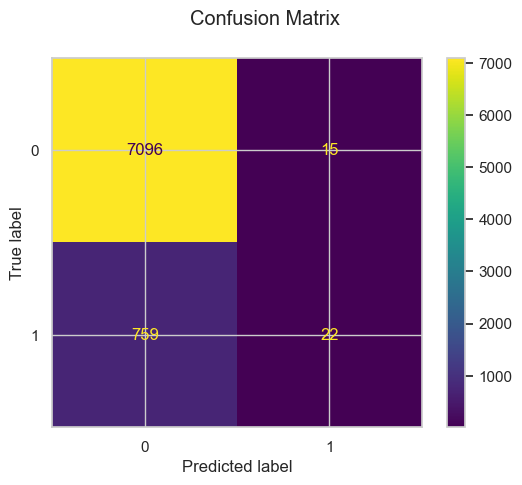

In [64]:
disp = ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [65]:
print(f"Classification report for classifier {clf}:\n"
      f"{metrics.classification_report(y_test, predicted)}\n")

Classification report for classifier MLPClassifier(hidden_layer_sizes=(5, 2), random_state=1, solver='sgd'):
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      7111
           1       0.59      0.03      0.05       781

    accuracy                           0.90      7892
   macro avg       0.75      0.51      0.50      7892
weighted avg       0.87      0.90      0.86      7892




In [57]:
pip install palettable


     ---------------------------------------- 0.0/332.3 kB ? eta -:--:--
     ---------------------------------------- 0.0/332.3 kB ? eta -:--:--
     ---------------------------------------- 0.0/332.3 kB ? eta -:--:--
     ---------------------------------------- 0.0/332.3 kB ? eta -:--:--
     - -------------------------------------- 10.2/332.3 kB ? eta -:--:--
     - -------------------------------------- 10.2/332.3 kB ? eta -:--:--
     - -------------------------------------- 10.2/332.3 kB ? eta -:--:--
     --- --------------------------------- 30.7/332.3 kB 145.2 kB/s eta 0:00:03
     --- --------------------------------- 30.7/332.3 kB 145.2 kB/s eta 0:00:03
     --- --------------------------------- 30.7/332.3 kB 145.2 kB/s eta 0:00:03
     ---- -------------------------------- 41.0/332.3 kB 103.4 kB/s eta 0:00:03
     ---- -------------------------------- 41.0/332.3 kB 103.4 kB/s eta 0:00:03
     ---- -------------------------------- 41.0/332.3 kB 103.4 kB/s eta 0:00:03
     

In [58]:
import VisualizeNN as VisNN

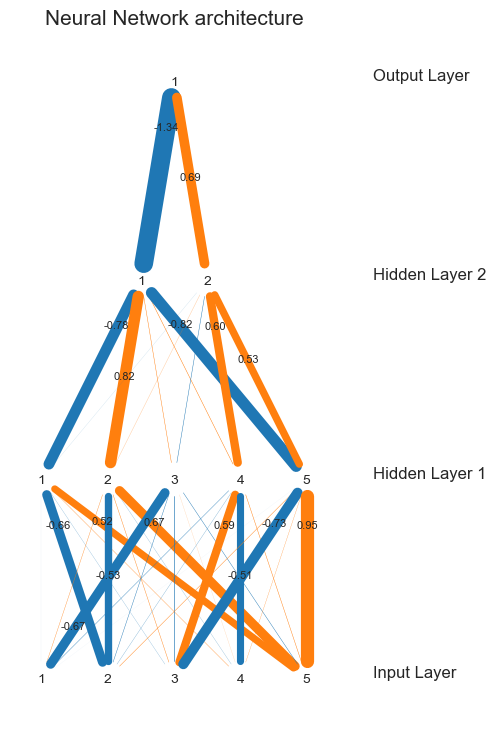

In [66]:
training_set_outputs = np.array([y_train]).T
#classifier.fit(X, y.ravel())
network_structure = np.hstack(([X_train.shape[1]], np.asarray(clf.hidden_layer_sizes), training_set_outputs.shape[1]))

# Draw the Neural Network with weights
network=VisNN.DrawNN(network_structure, clf.coefs_)
network.draw()

# Evaluation

# Conclusion and Recommendation